In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import re
import warnings
# Ignore all future warnings
warnings.simplefilter(action='ignore')
# sns.set_theme(style="darkgrid", palette="rainbow")
# %matplotlib inline

In [2]:
sns.set_theme(style="darkgrid", palette="rainbow")
%matplotlib inline

In [3]:
reviews = pd.read_csv("reviews.csv")
reviews.head(2)

,hotel_id,hotel_name,addressline1,city,state,numberrooms,yearopened,yearrenovated,number_of_reviews,rating_average,...,reviewtitle,comment,positive,negative,score,accommodationtype1,accommodationtype2,accommodationtype3,accommodationtype4,language
0,163,Ramana Saigon Hotel,"323 Le Van Sy Street, District 3",Ho Chi Minh City,Ho Chi Minh,296.0,1996.0,2015.0,1713,8.1,...,HCM Short Trip”,A tourist class hotel with very basic amenitie...,NaN,NaN,6.4,Hotel,NaN,NaN,NaN,en
1,163,Ramana Saigon Hotel,"323 Le Van Sy Street, District 3",Ho Chi Minh City,Ho Chi Minh,296.0,1996.0,2015.0,1713,8.1,...,Hospitality low ”,The hotel rooms etc are good but very very sti...,NaN,NaN,7.6,Hotel,NaN,NaN,NaN,en


In [4]:
check = reviews[(reviews['accommodationtype1'] == 'Hotel') | (reviews['accommodationtype2'] == 'Hotel') | (reviews['accommodationtype3'] == 'Hotel')| (reviews['accommodationtype4'] == 'Hotel')]
reviews = reviews[reviews['hotel_id'].isin(check.hotel_id)]
reviews.shape

(197508, 24)

In [5]:
city = pd.read_csv("city.csv")
city.shape

(29446, 41)

In [6]:
df_type = pd.read_csv("df_type.csv")
df_type.shape

(29446, 6)

In [7]:
check = df_type[(df_type['type1'] == 'Hotel') | (df_type['type2'] == 'Hotel') | (df_type['type3'] == 'Hotel')| (df_type['type4'] == 'Hotel')]
hotel = city[city['hotel_id'].isin(check.hotel_id)]
hotel.shape

(8574, 41)

In [8]:
check = df_type[(df_type['type1'] == 'Hotel') | (df_type['type2'] == 'Hotel') | (df_type['type3'] == 'Hotel')| (df_type['type4'] == 'Hotel')]
hotel_reviews = reviews[reviews['hotel_id'].isin(check.hotel_id)]
hotel_reviews.shape

(197508, 24)

In [21]:
hotel_reviews.to_csv('hotel_reviews.csv', index=False, encoding='utf-8-sig')

In [22]:
hotel.to_csv('hotel.csv', index=False, encoding='utf-8-sig')

In [9]:
len(hotel_reviews.hotel_id.unique())

1449

In [20]:
# hotel_reviews.national.unique()

In [11]:
def assign_continent(country):
    asia = ['Việt Nam', 'Hàn Quốc', 'Malaysia', 'Trung Quốc', 'Nhật Bản', 'Philippines', 'Thái Lan', 'Singapore', 'Ấn Độ', 'Campuchia', 'Đài Loan', 'Indonesia', 'Mông Cổ', 'Kazakhstan', 'Sri Lanka', 'Maldives', 'Ma Cao', 'Myanmar', 'Qatar', 'Ả Rập Xê Út', 'Nepal', 'Lào', 'Brunei Darussalam', 'Thổ Nhĩ Kỳ', 'Pakistan', 'Oman', 'Bhutan', 'Jordan', 'Afghanistan', 'Bangladesh', 'Armenia', 'Kyrgyzstan', 'Turkmenistan', 'Iraq', 'Uzbekistan', 'Azerbaijan']
    europe = ['Vương quốc Anh', 'Pháp', 'Đức', 'Thụy Điển', 'Bồ Đào Nha', 'Thụy Sĩ', 'Tây Ban Nha', 'Nga', 'Na Uy', 'Bỉ', 'Cộng hòa Séc', 'Guernsey', 'Phần Lan', 'Áo', 'Đan Mạch', 'Bắc Macedonia', 'Ý', 'Lithuania', 'Hà Lan', 'Ba Lan', 'Hungary', 'Ireland', 'Iceland', 'Ukraine', 'Serbia', 'Rumani', 'Slovenia', 'Slovakia', 'Belarus', 'Hy Lạp', 'Croatia', 'Latvia', 'Luxembourg', 'Georgia', 'Bulgaria', 'Albania', 'Montenegro', 'Malta', 'Andorra', 'Cộng hoà Síp']
    north_america = ['Hoa Kỳ', 'Canada', 'Quần đảo U.S. Virgin', 'Quần đảo Cayman', 'Mexico', 'Greenland', 'Bermuda', 'Bahamas', 'Barbados', 'Guatemala', 'Honduras', 'Trinidad và Tobago']
    south_america = ['Colombia', 'Chile', 'Argentina', 'Brazil', 'Venezuela', 'Uruguay', 'Bolivia', 'Peru', 'Ecuador']
    africa = ['Yemen', 'Algeria', 'Nam Phi', 'Tunisia', 'Zimbabwe', 'Eswatini', 'Cộng Hòa Congo', 'Nigeria', 'Zambia', 'Kenya', 'Morocco (Ma Rốc)', 'Gabon', 'Ai Cập', 'Ethiopia']
    oceania = ['Úc', 'New Zealand', 'Papua New Guinea', 'Fiji', 'Vanuatu']
    middle_east = ['Lebanon', 'Israel', 'Các Tiểu Vương Quốc Ả Rập Thống nhất', 'Cô oét', 'Bahrain']
    caribbean = ['Jamaica', 'Cộng hòa Dominica']

    if country in asia:
        return 'Asia'
    elif country in europe:
        return 'Europe'
    elif country in north_america:
        return 'North America'
    elif country in south_america:
        return 'South America'
    elif country in africa:
        return 'Africa'
    elif country in oceania:
        return 'Oceania'
    elif country in middle_east:
        return 'Middle East'
    elif country in caribbean:
        return 'Caribbean'
    else:
        return 'Others/Unclassified'



In [12]:
hotel_reviews['reviewer_continent'] = hotel_reviews['national'].apply(assign_continent)


In [13]:
coast = pd.read_csv("distance2coast.csv")
coast.shape

(29446, 6)

In [14]:
reviews.shape

(197508, 24)

In [15]:
def coast_reviews(id:float):
    global coast,hotel_reviews,reviews
    check = coast[coast.distance2coastline<id]
    hotel_reviews = reviews[reviews['hotel_id'].isin(check.hotel_id)]
    
    return hotel_reviews.shape[0]

In [16]:
def coast_prox(id:float):
    global coast,hotel,reviews
    check = coast[coast.distance2coastline<id]
    num_hotel = hotel[hotel['hotel_id'].isin(check.hotel_id)]
    return num_hotel.shape[0]

In [17]:
len(hotel.hotel_id.unique())

8574

In [18]:
len(hotel_reviews.hotel_id.unique())

1449

In [19]:
hotel.hotel_id

0             163
1             902
3            3274
4            9195
5            9698
           ...   
29386    52521493
29400    52523960
29401    52524458
29436    52531120
29442    52541929
Name: hotel_id, Length: 8574, dtype: int64

In [188]:
hotel_coast = coast[coast.hotel_id.isin(hotel.hotel_id)]
hotel_coast.shape

(8574, 6)

In [161]:
coast[coast.distance2coastline<1]

,hotel_id,longitude,latitude,hotel_coordinate,distance2coastline,nearest_coordinate
2,2019,108.369757,15.895125,POINT (108.369757 15.895125),0.121,POINT (12063732.127501428 1780986.7836629346)
12,10951,108.219727,16.063019,POINT (108.219727 16.063019),0.246,POINT (12047209.874546735 1800187.296025958)
13,10953,108.249839,16.040144,POINT (108.249839 16.040144),0.210,POINT (12050512.24113917 1797649.0899056264)
43,10996,108.367332,15.896595,POINT (108.367332 15.896595),0.126,POINT (12063464.805837113 1781159.9328711773)
49,11004,109.192105,12.082017,POINT (109.192105 12.082017),0.282,POINT (12155479.096077917 1346188.3860276996)
...,...,...,...,...,...,...
29408,52527786,109.200049,12.272787,POINT (109.200049 12.272787),0.316,POINT (12156364.538922032 1367855.8103946142)
29426,52528551,108.280266,15.975944,POINT (108.280266 15.975944),0.264,POINT (12053931.387648247 1790317.3206990692)
29440,52541154,105.915469,19.760866,POINT (105.915469 19.760866),0.000,POINT (11790455.999639146 2230284.1307780244)
29441,52541920,108.039314,10.860923,POINT (108.039314 10.860923),0.957,POINT (12027748.717115507 1207887.9327760863)


In [151]:
values

[0, 1388, 1388, 1388, 1388, 1388, 1388, 1388, 1388, 1388]

In [122]:
values = [coast_prox(i/10) for i in range(10)]
index = [float(i/2) for i in range(10)]

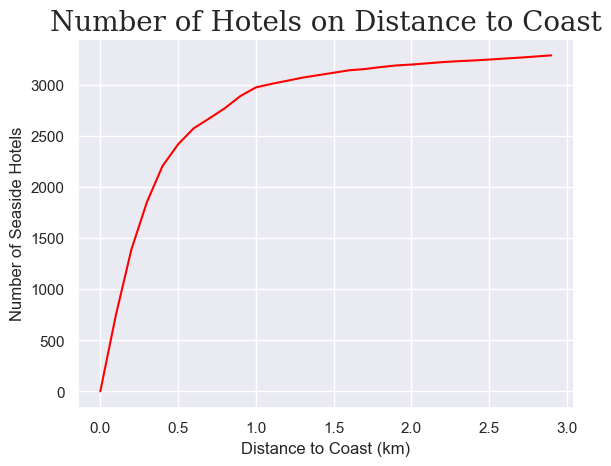

In [229]:
# values = [coast[coast.distance2coastline<float(i/10)].shape[0] for i in range(20)]
# index = [float(i/10) for i in range(20)]
values = [coast_prox(i/10) for i in range(30)]
# values_2 = [coast_prox(i/10) for i in range(30)]

index = [float(i/10) for i in range(30)]
# Plotting the line plot
plt.plot(index, values,color = 'r', linestyle='-')
plt.xlabel('Distance to Coast (km)')
plt.ylabel('Number of Seaside Hotels')
plt.title('Number of Hotels on Distance to Coast', fontsize=20, fontfamily='serif')
plt.grid(True)
plt.savefig('figures/IMG9.png')

plt.show()

In [228]:
coast_reviews(3)*100/coast_reviews(500)

35.64513842477267

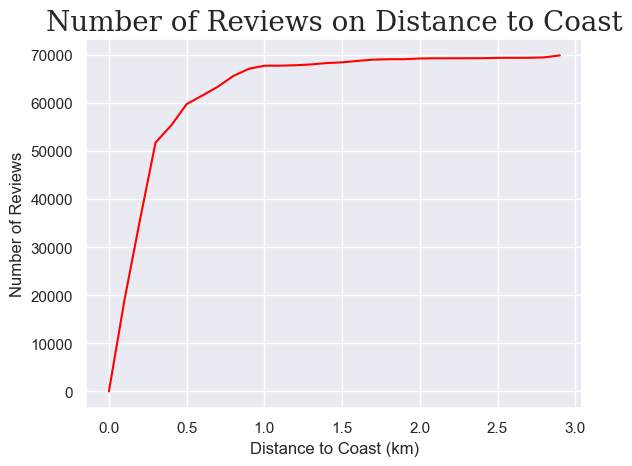

In [230]:
# values = [coast[coast.distance2coastline<float(i/10)].shape[0] for i in range(20)]
# index = [float(i/10) for i in range(20)]
values = [coast_reviews(i/10) for i in range(30)]
# values_2 = [coast_prox(i/10) for i in range(30)]

index = [float(i/10) for i in range(30)]
# Plotting the line plot
plt.plot(index, values,color = 'r', linestyle='-')
plt.xlabel('Distance to Coast (km)')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews on Distance to Coast', fontsize=20, fontfamily='serif')
plt.grid(True)
plt.savefig('figures/IMG10.png')

plt.show()

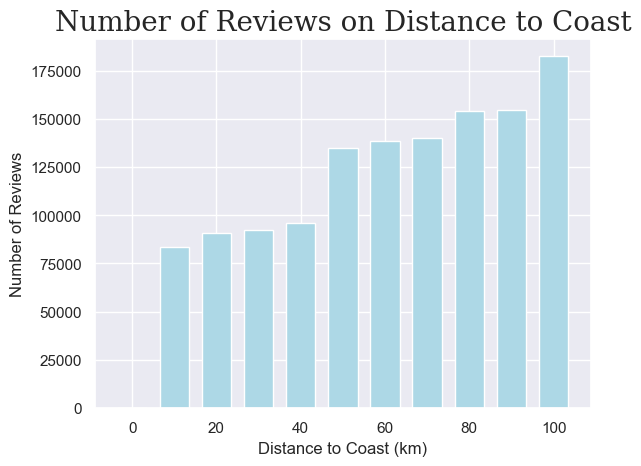

In [224]:
values = [coast_reviews(i*10) for i in range(11)]
index = [float(i*10) for i in range(11)]

# Plotting the bar chart
plt.bar(index, values, width=7, color='lightblue', label='Histogram')  # Adjust width as per preference
plt.xlabel('Distance to Coast (km)')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews on Distance to Coast', fontsize=20, fontfamily='serif')
plt.savefig('figures/IMG11.png')

plt.show()

In [207]:
coast_reviews(200)

191420

In [7]:
test = coast[coast.distance2coastline<5] 
print(test.shape)

(11289, 6)


In [8]:
len(city.hotel_id.unique())

29446

In [9]:
len(reviews.hotel_id.unique())

2385

In [10]:
2385*100/29446

8.099572098077838

In [11]:
hotel_ids = test['hotel_id'].unique()

# Then, filter DataFrame B based on these hotel_ids
filtered = reviews[reviews['hotel_id'].isin(hotel_ids)]

In [12]:
filtered.shape

(142833, 24)

In [13]:
reviews.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286096 entries, 0 to 286095
Columns: 24 entries, hotel_id to language
dtypes: float64(6), int64(2), object(16)
memory usage: 52.4+ MB


In [14]:
reviews.describe(exclude=['O'])

,hotel_id,numberrooms,yearopened,yearrenovated,number_of_reviews,rating_average,star_rating,score
count,2.860960e+05,286096.000000,209242.000000,140011.000000,286096.000000,286096.000000,286096.000000,286096.000000
mean,2.451129e+06,70.288501,2002.098842,1949.913385,1252.086121,8.407547,3.052703,8.370227
std,3.373630e+06,78.473965,146.396953,364.474240,1785.664915,0.686125,1.311933,1.850678
min,1.630000e+02,0.000000,0.000000,0.000000,6.000000,3.200000,0.000000,0.000000
25%,3.936470e+05,21.000000,2011.000000,2015.000000,254.000000,8.000000,2.000000,7.600000
50%,1.161217e+06,40.000000,2015.000000,2019.000000,541.000000,8.500000,3.000000,9.000000
75%,2.324693e+06,91.000000,2016.000000,2022.000000,1405.000000,8.900000,4.000000,10.000000
max,1.806638e+07,895.000000,2024.000000,2024.000000,9649.000000,10.000000,5.000000,10.000000


## Languages Distribution and Nationals Distribution:

In [15]:
df1 = reviews.national.value_counts()
df1

Việt Nam                          85921
Hàn Quốc                          51612
Úc                                13040
Hoa Kỳ                            12007
Nhật Bản                          11507
                                  ...  
Somalia                               1
Dominica                              1
Đảo Norfolk                           1
Gibraltar                             1
Lãnh thổ Ấn Độ Dương thuộc Anh        1
Name: national, Length: 191, dtype: int64

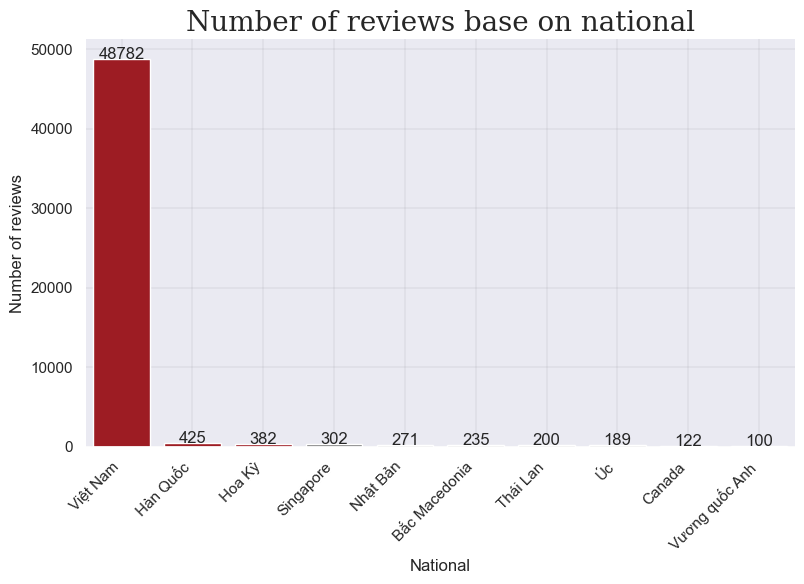

In [32]:
top10_hotel_by_city = reviews[reviews.language == 'vi'].national.value_counts().head(10)

# Create a bar plot with custom colors
plt.figure(figsize=(8, 6))
colors = ['#b20710' if i < 3 else 'gray' for i in range(top10_hotel_by_city.shape[0])]
sns.barplot(x=top10_hotel_by_city.index, y=top10_hotel_by_city.values, palette=colors)
for i in range(top10_hotel_by_city.shape[0]):
    plt.text(i, top10_hotel_by_city.values[i] + 3, str(top10_hotel_by_city.values[i]), ha='center')
plt.title('Number of reviews base on national', fontsize=20, fontfamily='serif')
plt.xlabel('National')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ylabel('Number of reviews')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

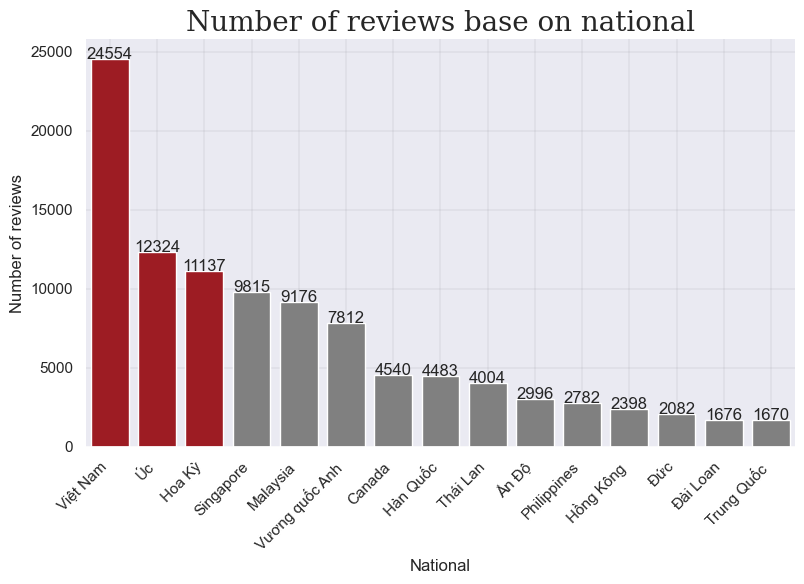

In [17]:
top10_hotel_by_city = reviews[reviews.language == 'en'].national.value_counts().head(15)

# Create a bar plot with custom colors
plt.figure(figsize=(8, 6))
colors = ['#b20710' if i < 3 else 'gray' for i in range(top10_hotel_by_city.shape[0])]
sns.barplot(x=top10_hotel_by_city.index, y=top10_hotel_by_city.values, palette=colors)
for i in range(top10_hotel_by_city.shape[0]):
    plt.text(i, top10_hotel_by_city.values[i] + 3, str(top10_hotel_by_city.values[i]), ha='center')
plt.title('Number of reviews base on national', fontsize=20, fontfamily='serif')
plt.xlabel('National')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ylabel('Number of reviews')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [18]:
reviews[reviews['national'] == 'Hàn Quốc'].language.value_counts()
# filtered_reviews = reviews[reviews['national'].isin(['Hoa Kỳ', 'Úc', 'Ấn Độ', 'Anh'])]


ja         45960
en          4483
vi           425
ur           246
unknown      230
hi           107
sw            62
th            26
it            17
zh            14
ru            14
fr             7
de             6
tr             5
pt             4
nl             2
ar             1
bg             1
el             1
es             1
Name: language, dtype: int64

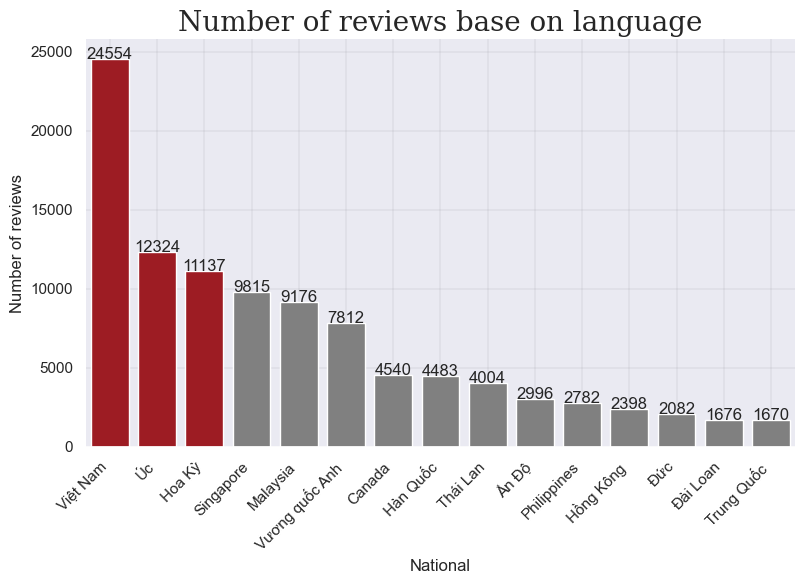

In [19]:
# top10_hotel_by_city = reviews[reviews['national'].isin(['Hoa Kỳ', 'Úc', 'Ấn Độ', 'Vương quốc Anh','Singapore','Malaysia','Canada'])].language.value_counts().head(15)

# Create a bar plot with custom colors
plt.figure(figsize=(8, 6))
colors = ['#b20710' if i < 3 else 'gray' for i in range(top10_hotel_by_city.shape[0])]
sns.barplot(x=top10_hotel_by_city.index, y=top10_hotel_by_city.values, palette=colors)
for i in range(top10_hotel_by_city.shape[0]):
    plt.text(i, top10_hotel_by_city.values[i] + 3, str(top10_hotel_by_city.values[i]), ha='center')
plt.title('Number of reviews base on language', fontsize=20, fontfamily='serif')
plt.xlabel('National')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ylabel('Number of reviews')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

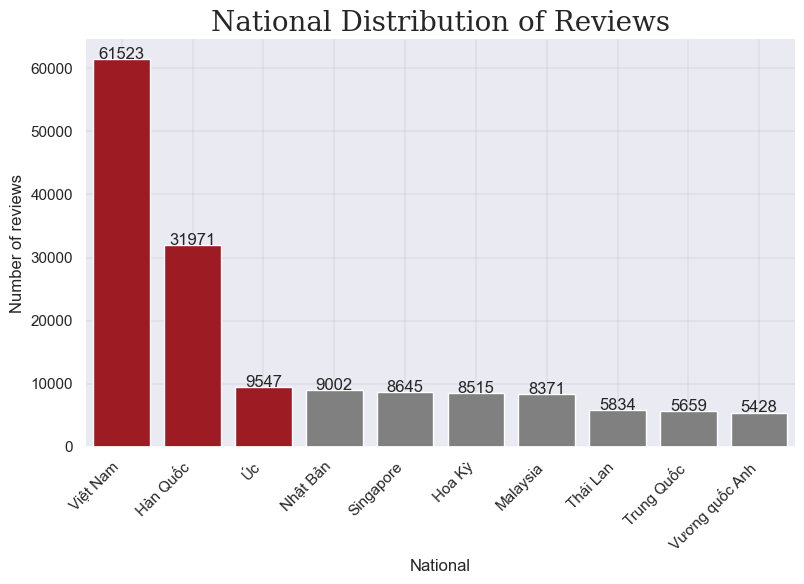

In [97]:
nationalities = ['Việt Nam']



# top10_hotel_by_city = reviews[reviews['national'].isin(nationalities)].language.value_counts().head(15)
top10_hotel_by_city = reviews.national.value_counts().head(10)
# Create a bar plot with custom colors
plt.figure(figsize=(8, 6))
colors = ['#b20710' if i < 3 else 'gray' for i in range(top10_hotel_by_city.shape[0])]
sns.barplot(x=top10_hotel_by_city.index, y=top10_hotel_by_city.values, palette=colors)
for i in range(top10_hotel_by_city.shape[0]):
    plt.text(i, top10_hotel_by_city.values[i] + 3, str(top10_hotel_by_city.values[i]), ha='center')
plt.title('National Distribution of Reviews', fontsize=20, fontfamily='serif')
plt.xlabel('National')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ylabel('Number of reviews')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig('figures/IMG2.png')

plt.show()


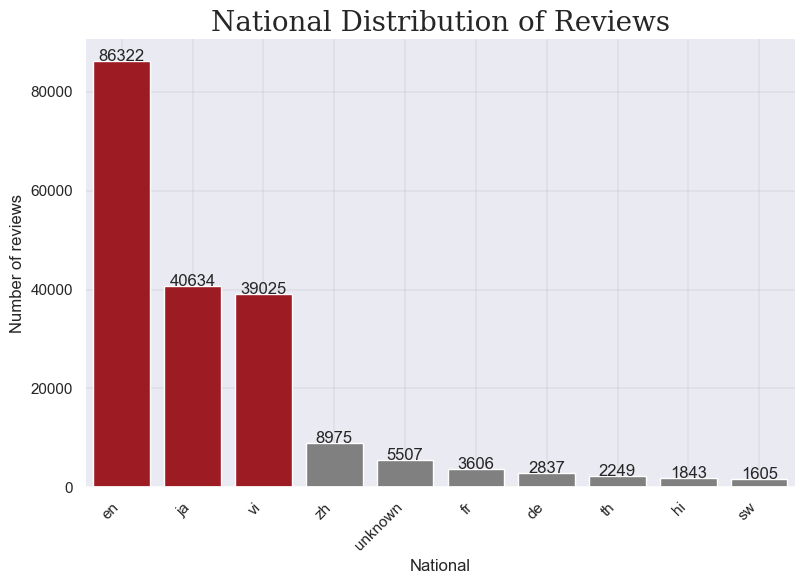

In [96]:
nationalities = ['Việt Nam']



# top10_hotel_by_city = reviews[reviews['national'].isin(nationalities)].language.value_counts().head(15)
top10_hotel_by_city = reviews.language.value_counts().head(10)
# Create a bar plot with custom colors
plt.figure(figsize=(8, 6))
colors = ['#b20710' if i < 3 else 'gray' for i in range(top10_hotel_by_city.shape[0])]
sns.barplot(x=top10_hotel_by_city.index, y=top10_hotel_by_city.values, palette=colors)
for i in range(top10_hotel_by_city.shape[0]):
    plt.text(i, top10_hotel_by_city.values[i] + 3, str(top10_hotel_by_city.values[i]), ha='center')
plt.title('National Distribution of Reviews', fontsize=20, fontfamily='serif')
plt.xlabel('National')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ylabel('Number of reviews')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig('figures/IMG2.png')

plt.show()


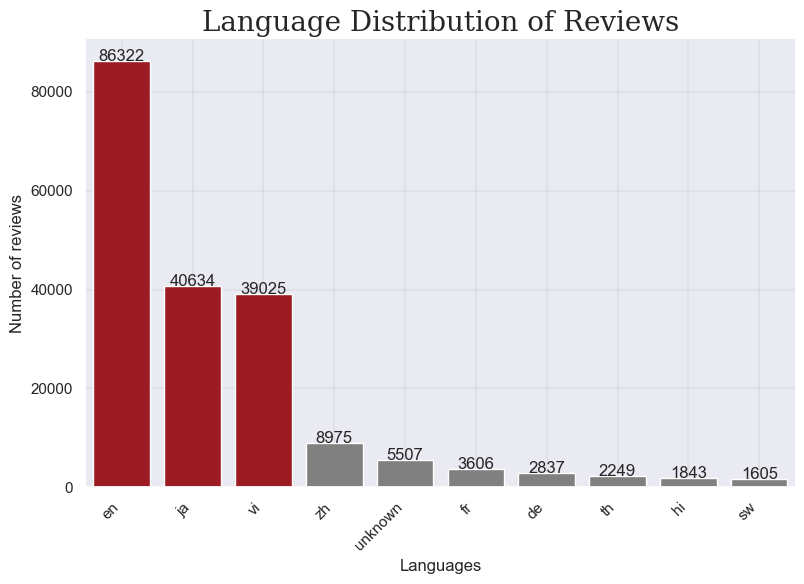

In [95]:
# Define the nationalities
nationalities = ['Việt Nam', 'Úc', 'Hoa Kỳ', 'Singapore', 'Malaysia', 'Vương quốc Anh', 'Canada']

# Filter reviews for the specified nationalities and count the top 15 languages
top10_hotel_by_city = reviews.language.value_counts().head(10)


# top10_hotel_by_city = reviews[reviews['national'].isin(nationalities)].language.value_counts().head(15)
# top10_hotel_by_city = reviews.national.value_counts().head(10)
# Create a bar plot with custom colors
plt.figure(figsize=(8, 6))
colors = ['#b20710' if i < 3 else 'gray' for i in range(top10_hotel_by_city.shape[0])]
sns.barplot(x=top10_hotel_by_city.index, y=top10_hotel_by_city.values, palette=colors)
for i in range(top10_hotel_by_city.shape[0]):
    plt.text(i, top10_hotel_by_city.values[i] + 3, str(top10_hotel_by_city.values[i]), ha='center')
plt.title('Language Distribution of Reviews', fontsize=20, fontfamily='serif')
plt.xlabel('Languages')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ylabel('Number of reviews')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig('figures/IMG1.png')

plt.show()


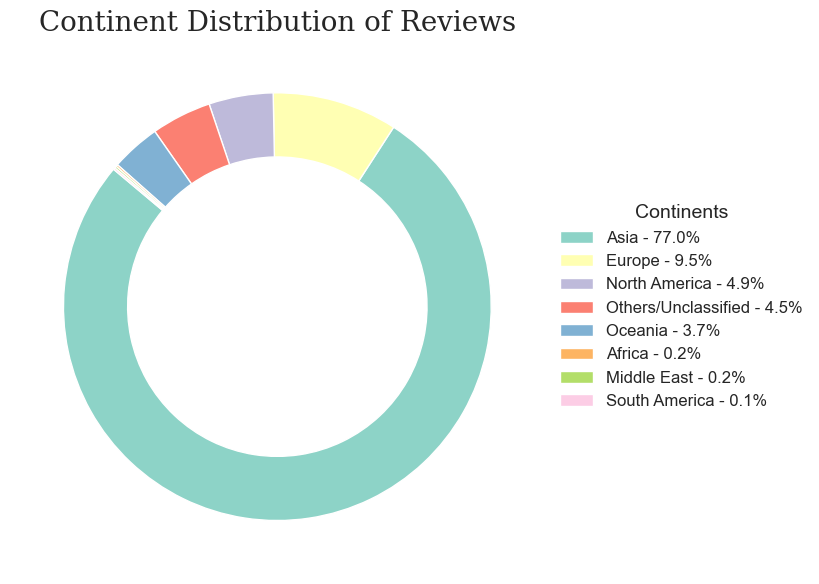

In [245]:
# Create a horizontal bar chart
top10_continents = hotel_reviews.reviewer_continent.value_counts().head(10)


# Create a donut chart
plt.figure(figsize=(8, 6))
wedges, texts = plt.pie(top10_continents.values, colors=colors, startangle=140, textprops={'fontsize': 12, 'fontfamily': 'serif'}, wedgeprops=dict(width=0.3))

plt.title('Continent Distribution of Reviews', fontsize=20, fontfamily='serif')

plt.gca().set_aspect('equal')

# Calculate percentages
percentages = 100 * top10_continents.values / top10_continents.values.sum()

# Create custom legend labels with percentages
legend_labels = [f'{cont} - {perc:.1f}%' for cont, perc in zip(top10_continents.index, percentages)]

# Add a legend
plt.legend(wedges, legend_labels, title="Continents", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12, title_fontsize=14, frameon=False)

plt.tight_layout()
plt.savefig('figures/IMG12.png')
plt.show()


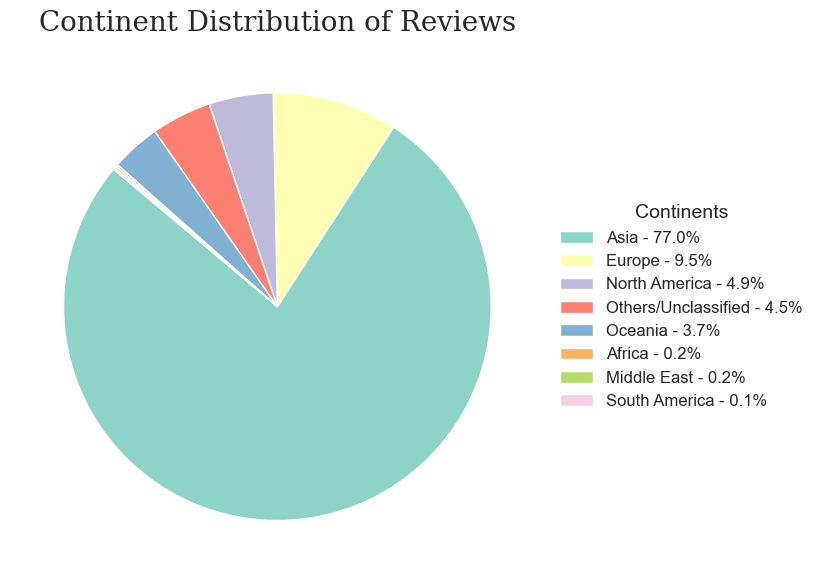

In [242]:
# Define the nationalities

# Filter reviews for the specified nationalities and count the top 15 languages
top10_hotel_by_city = hotel_reviews.reviewer_continent.value_counts().head(10)

# Define a different color scheme
colors = sns.color_palette("Set3", top10_hotel_by_city.shape[0])

# Create a pie chart
plt.figure(figsize=(8, 6))
wedges, texts = plt.pie(top10_hotel_by_city.values, colors=colors, startangle=140, textprops={'fontsize': 12, 'fontfamily': 'serif'})

# plt.title('Language of Reviews from English-Speaking Countries', fontsize=20, fontfamily='serif')
plt.title('Continent Distribution of Reviews', fontsize=20, fontfamily='serif')

plt.gca().set_aspect('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Calculate percentages
percentages = 100 * top10_hotel_by_city.values / top10_hotel_by_city.values.sum()

# Create custom legend labels with percentages
legend_labels = [f'{lang} - {perc:.1f}%' for lang, perc in zip(top10_hotel_by_city.index, percentages)]

# Add a legend
plt.legend(wedges, legend_labels, title="Continents", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12, title_fontsize=14, frameon=False)

plt.tight_layout()

plt.savefig('figures/IMG12.png')

plt.show()

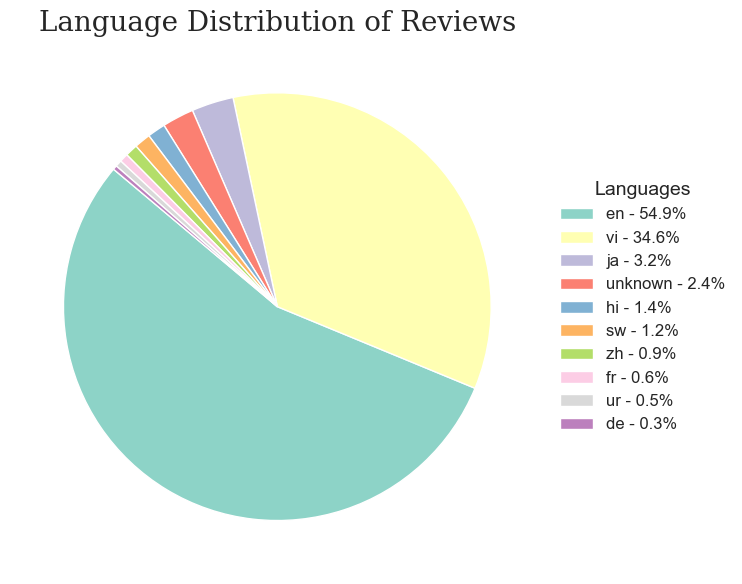

In [35]:
# Define the nationalities
nationalities = ['Việt Nam', 'Úc', 'Hoa Kỳ', 'Singapore', 'Malaysia', 'Vương quốc Anh', 'Canada']

# Filter reviews for the specified nationalities and count the top 15 languages
top10_hotel_by_city = reviews[reviews['national'].isin(nationalities)].language.value_counts().head(10)

# Define a different color scheme
colors = sns.color_palette("Set3", top10_hotel_by_city.shape[0])

# Create a pie chart
plt.figure(figsize=(8, 6))
wedges, texts = plt.pie(top10_hotel_by_city.values, colors=colors, startangle=140, textprops={'fontsize': 12, 'fontfamily': 'serif'})

# plt.title('Language of Reviews from English-Speaking Countries', fontsize=20, fontfamily='serif')
plt.title('Language Distribution of Reviews', fontsize=20, fontfamily='serif')

plt.gca().set_aspect('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Calculate percentages
percentages = 100 * top10_hotel_by_city.values / top10_hotel_by_city.values.sum()

# Create custom legend labels with percentages
legend_labels = [f'{lang} - {perc:.1f}%' for lang, perc in zip(top10_hotel_by_city.index, percentages)]

# Add a legend
plt.legend(wedges, legend_labels, title="Languages", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12, title_fontsize=14, frameon=False)

plt.tight_layout()

plt.savefig('figures/IMG1.png')

plt.show()

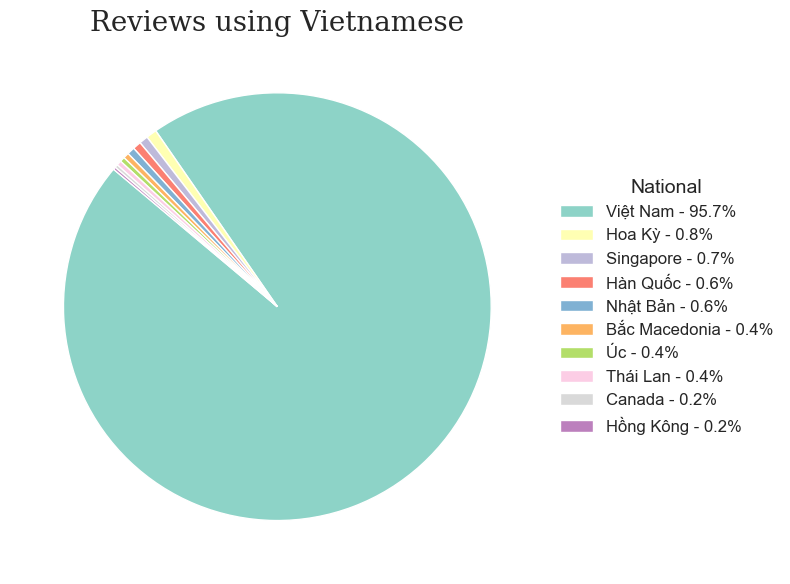

In [98]:
# # Define the nationalities
# nationalities = ['Việt Nam', 'Úc', 'Hoa Kỳ', 'Singapore', 'Malaysia', 'Vương quốc Anh', 'Canada']

# # Filter reviews for the specified nationalities and count the top 15 languages
top10_hotel_by_city = reviews[reviews.language == 'vi'].national.value_counts().head(10)

# Define a different color scheme
colors = sns.color_palette("Set3", top10_hotel_by_city.shape[0])

# Create a pie chart
plt.figure(figsize=(8, 6))
wedges, texts = plt.pie(top10_hotel_by_city.values, colors=colors, startangle=140, textprops={'fontsize': 12, 'fontfamily': 'serif'})

# plt.title('Language of Reviews from English-Speaking Countries', fontsize=20, fontfamily='serif')
plt.title('Reviews using Vietnamese', fontsize=20, fontfamily='serif')

plt.gca().set_aspect('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Calculate percentages
percentages = 100 * top10_hotel_by_city.values / top10_hotel_by_city.values.sum()

# Create custom legend labels with percentages
legend_labels = [f'{lang} - {perc:.1f}%' for lang, perc in zip(top10_hotel_by_city.index, percentages)]

# Add a legend
plt.legend(wedges, legend_labels, title="National", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12, title_fontsize=14, frameon=False)

plt.tight_layout()

plt.savefig('figures/IMG5.png')

plt.show()

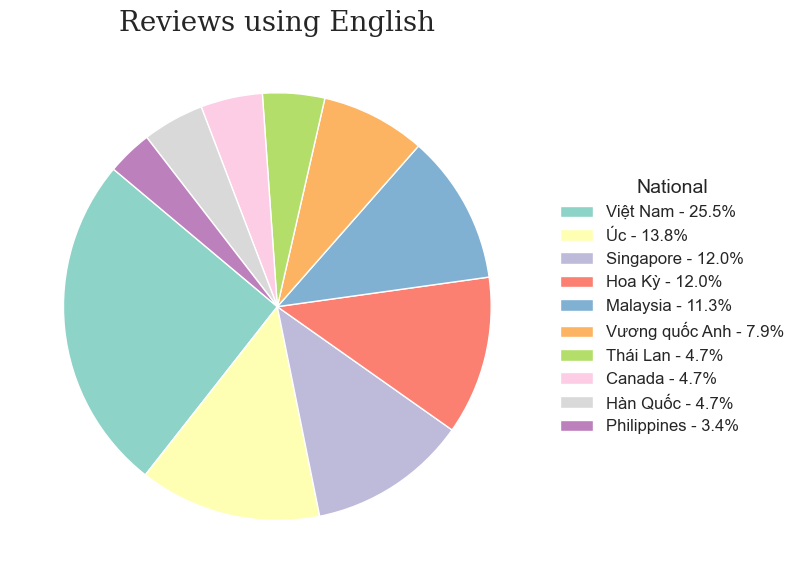

In [99]:
# # Define the nationalities
# nationalities = ['Việt Nam', 'Úc', 'Hoa Kỳ', 'Singapore', 'Malaysia', 'Vương quốc Anh', 'Canada']

# # Filter reviews for the specified nationalities and count the top 15 languages
top10_hotel_by_city = reviews[reviews.language == 'en'].national.value_counts().head(10)

# Define a different color scheme
colors = sns.color_palette("Set3", top10_hotel_by_city.shape[0])

# Create a pie chart
plt.figure(figsize=(8, 6))
wedges, texts = plt.pie(top10_hotel_by_city.values, colors=colors, startangle=140, textprops={'fontsize': 12, 'fontfamily': 'serif'})

# plt.title('Language of Reviews from English-Speaking Countries', fontsize=20, fontfamily='serif')
plt.title('Reviews using English', fontsize=20, fontfamily='serif')

plt.gca().set_aspect('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Calculate percentages
percentages = 100 * top10_hotel_by_city.values / top10_hotel_by_city.values.sum()

# Create custom legend labels with percentages
legend_labels = [f'{lang} - {perc:.1f}%' for lang, perc in zip(top10_hotel_by_city.index, percentages)]

# Add a legend
plt.legend(wedges, legend_labels, title="National", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12, title_fontsize=14, frameon=False)

plt.tight_layout()

plt.savefig('figures/IMG6.png')

plt.show()

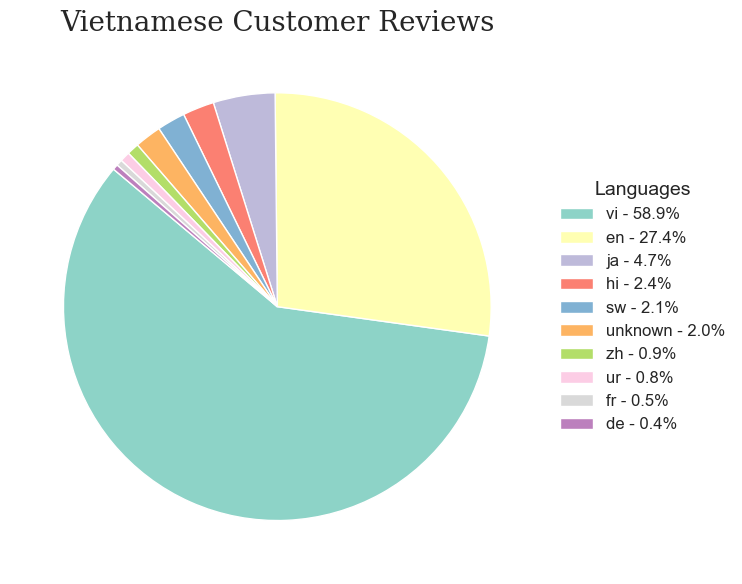

In [100]:
# # Define the nationalities
# nationalities = ['Việt Nam', 'Úc', 'Hoa Kỳ', 'Singapore', 'Malaysia', 'Vương quốc Anh', 'Canada']

# # Filter reviews for the specified nationalities and count the top 15 languages
top10_hotel_by_city = reviews[reviews.national == 'Việt Nam'].language.value_counts().head(10)

# Define a different color scheme
colors = sns.color_palette("Set3", top10_hotel_by_city.shape[0])

# Create a pie chart
plt.figure(figsize=(8, 6))
wedges, texts = plt.pie(top10_hotel_by_city.values, colors=colors, startangle=140, textprops={'fontsize': 12, 'fontfamily': 'serif'})

# plt.title('Language of Reviews from English-Speaking Countries', fontsize=20, fontfamily='serif')
plt.title('Vietnamese Customer Reviews', fontsize=20, fontfamily='serif')

plt.gca().set_aspect('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Calculate percentages
percentages = 100 * top10_hotel_by_city.values / top10_hotel_by_city.values.sum()

# Create custom legend labels with percentages
legend_labels = [f'{lang} - {perc:.1f}%' for lang, perc in zip(top10_hotel_by_city.index, percentages)]

# Add a legend
plt.legend(wedges, legend_labels, title="Languages", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12, title_fontsize=14, frameon=False)

plt.tight_layout()

plt.savefig('figures/IMG7.png')

plt.show()

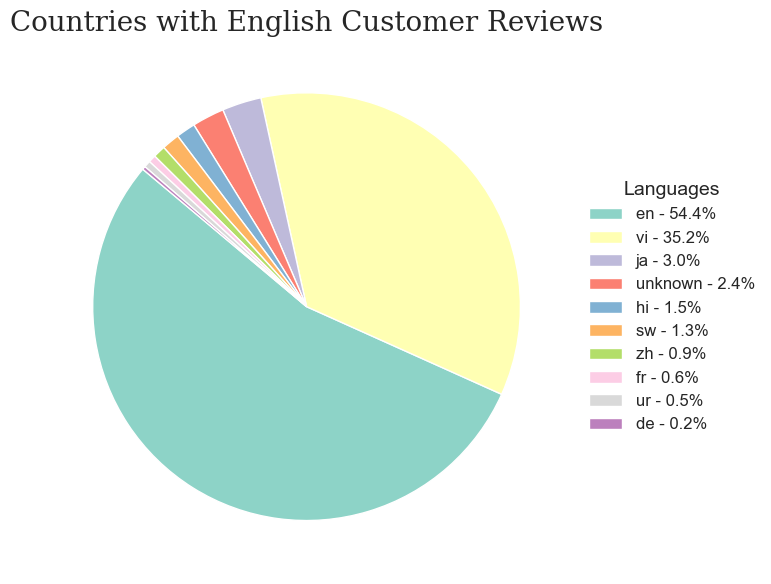

In [101]:
nationalities = ['Việt Nam', 'Úc', 'Hoa Kỳ', 'Singapore', 'Malaysia', 'Vương quốc Anh', 'Canada']

# Filter reviews for the specified nationalities and count the top 15 languages
top10_hotel_by_city = reviews[reviews['national'].isin(nationalities)].language.value_counts().head(10)

# Define a different color scheme
colors = sns.color_palette("Set3", top10_hotel_by_city.shape[0])

# Create a pie chart
plt.figure(figsize=(8, 6))
wedges, texts = plt.pie(top10_hotel_by_city.values, colors=colors, startangle=140, textprops={'fontsize': 12, 'fontfamily': 'serif'})

# plt.title('Language of Reviews from English-Speaking Countries', fontsize=20, fontfamily='serif')
plt.title('Countries with English Customer Reviews', fontsize=20, fontfamily='serif')

plt.gca().set_aspect('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Calculate percentages
percentages = 100 * top10_hotel_by_city.values / top10_hotel_by_city.values.sum()

# Create custom legend labels with percentages
legend_labels = [f'{lang} - {perc:.1f}%' for lang, perc in zip(top10_hotel_by_city.index, percentages)]

# Add a legend
plt.legend(wedges, legend_labels, title="Languages", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12, title_fontsize=14, frameon=False)

plt.tight_layout()

plt.savefig('figures/IMG8.png')

plt.show()

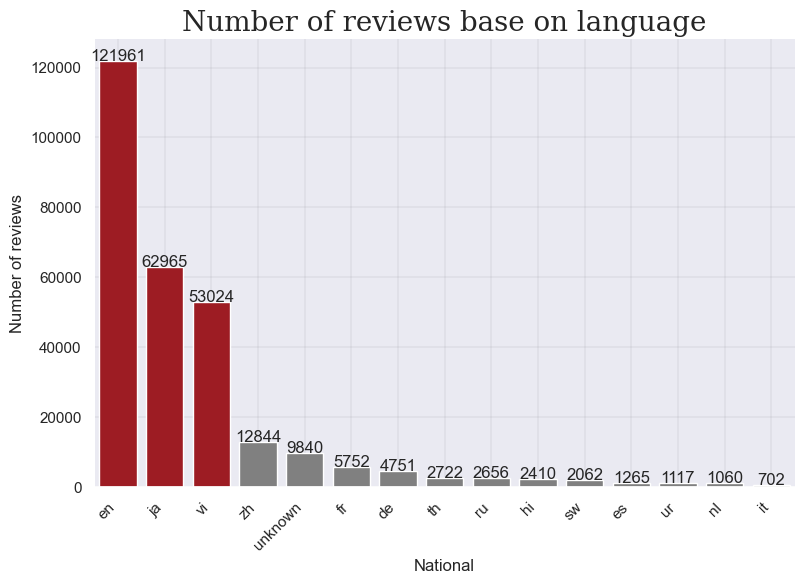

In [22]:
# nationalities = ['Việt Nam', 'Úc', 'Hoa Kỳ', 'Singapore', 'Malaysia', 'Vương quốc Anh', 'Canada']



top10_hotel_by_city = reviews.language.value_counts().head(15)

# Create a bar plot with custom colors
plt.figure(figsize=(8, 6))
colors = ['#b20710' if i < 3 else 'gray' for i in range(top10_hotel_by_city.shape[0])]
sns.barplot(x=top10_hotel_by_city.index, y=top10_hotel_by_city.values, palette=colors)
for i in range(top10_hotel_by_city.shape[0]):
    plt.text(i, top10_hotel_by_city.values[i] + 3, str(top10_hotel_by_city.values[i]), ha='center')
plt.title('Number of reviews base on language', fontsize=20, fontfamily='serif')
plt.xlabel('National')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ylabel('Number of reviews')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [23]:
reviews[reviews['national'] == 'Hàn Quốc'].language.value_counts()


ja         45960
en          4483
vi           425
ur           246
unknown      230
hi           107
sw            62
th            26
it            17
zh            14
ru            14
fr             7
de             6
tr             5
pt             4
nl             2
ar             1
bg             1
el             1
es             1
Name: language, dtype: int64

In [252]:
from transformers import pipeline

text = [
    "hotel good",
    "Ce hôtel est vraiment magnifique."
]

model_ckpt = "papluca/xlm-roberta-base-language-detection"
pipe = pipeline("text-classification", model=model_ckpt)
pipe(text, top_k=1, truncation=True)

def detect_language(text):
    try:
        return pipe(text, top_k=1, truncation=True)
    except:
        return 'unknown'
detect_language(text)
# Add a new column with detected languages
# df['language'] = df['comment'].apply(detect_language)
# df = pd.read_csv("original_data.csv")
# df['language'] = df['comment'].apply(detect_language)

[[{'label': 'en', 'score': 0.9909768104553223}],
 [{'label': 'fr', 'score': 0.9878166317939758}]]

In [253]:
detect_language(text)


[[{'label': 'en', 'score': 0.9909768104553223}],
 [{'label': 'fr', 'score': 0.9878166317939758}]]

In [ ]:
detect_language(text)
